In [2]:
import pandas as pd

df1=pd.read_csv(filepath_or_buffer= "../data/orders.csv",
               index_col = 0)

df1



,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,NaN
2398795,1,prior,2,3,7,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,7,29.0
431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...
2266710,206209,prior,10,5,18,29.0
1854736,206209,prior,11,4,10,30.0
626363,206209,prior,12,1,12,18.0


In [3]:
df2=pd.read_csv(filepath_or_buffer= "../data/products.csv",
               index_col = 0)
df2

,product_name,aisle_id,department_id
product_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13
...,...,...,...
49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49685,En Croute Roast Hazelnut Cranberry,42,1
49686,Artisan Baguette,112,3


In [4]:
df3=pd.read_csv(filepath_or_buffer= "../data/order_products.csv",
               index_col = 0)
df3

,product_id,add_to_cart_order,reordered
order_id,,,
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0
...,...,...,...
3421083,39678,6,1
3421083,11352,7,0
3421083,4600,8,0


In [5]:
list(df1.columns)

['user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [6]:
df2.columns 


Index(['product_name', 'aisle_id', 'department_id'], dtype='object')

In [7]:
df3.columns 

Index(['product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [8]:

# Merge orders and order-products on 'order_id'
merged_df = pd.merge(df3, df1, on='order_id', how='inner')

# Merge the result with the products dataset on 'product_id'
final_merged_df = pd.merge(merged_df, df2, on='product_id', how='inner')

# View the resulting merged dataset
print(final_merged_df.head())


   product_id  add_to_cart_order  reordered  user_id eval_set  order_number  \
0       33120                  1          1   202279    prior             3   
1       28985                  2          1   202279    prior             3   
2        9327                  3          0   202279    prior             3   
3       45918                  4          1   202279    prior             3   
4       30035                  5          0   202279    prior             3   

   order_dow  order_hour_of_day  days_since_prior_order  \
0          5                  9                     8.0   
1          5                  9                     8.0   
2          5                  9                     8.0   
3          5                  9                     8.0   
4          5                  9                     8.0   

            product_name  aisle_id  department_id  
0     Organic Egg Whites        86             16  
1  Michigan Organic Kale        83              4  
2          Gar

In [9]:
final_merged_df.shape

(32434489, 12)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(final_merged_df, test_size=0.99, stratify=final_merged_df['user_id'], random_state=42)

# Display the shape of the training and testing sets
print(f"Training set size: {train_df.shape[0]} rows")
print(f"Testing set size: {test_df.shape[0]} rows")

# Optional: Check the distribution of user_id in both sets
print("User ID distribution in training set:")
print(train_df['user_id'].value_counts(normalize=True))

print("User ID distribution in testing set:")
print(test_df['user_id'].value_counts(normalize=True))


Training set size: 324344 rows
Testing set size: 32110145 rows
User ID distribution in training set:
user_id
201268    0.000114
129928    0.000111
164055    0.000096
33731     0.000089
176478    0.000089
            ...   
77853     0.000003
92756     0.000003
100822    0.000003
120602    0.000003
37156     0.000003
Name: proportion, Length: 143811, dtype: float64
User ID distribution in testing set:
user_id
201268    1.148547e-04
129928    1.121764e-04
164055    9.436270e-05
186704    9.053214e-05
176478    9.006499e-05
              ...     
98654     9.342842e-08
22226     9.342842e-08
170850    9.342842e-08
204913    9.342842e-08
49581     9.342842e-08
Name: proportion, Length: 206209, dtype: float64


In [11]:
final_merged_df.columns

Index(['product_id', 'add_to_cart_order', 'reordered', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id'],
      dtype='object')

In [12]:
final_merged_df.head()


,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


In [13]:
df4=pd.read_csv(filepath_or_buffer= "../data/aisles.csv",
                index_col = 0)
df4

,aisle
aisle_id,
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation
...,...
130,hot cereal pancake mixes
131,dry pasta
132,beauty


In [14]:
# Convert the DataFrame to a dictionary with columns as keys
df_dict = df4.to_dict(orient='dict')['aisle']

# View the resulting dictionary (optional)
print(df_dict)


{1: 'prepared soups salads', 2: 'specialty cheeses', 3: 'energy granola bars', 4: 'instant foods', 5: 'marinades meat preparation', 6: 'other', 7: 'packaged meat', 8: 'bakery desserts', 9: 'pasta sauce', 10: 'kitchen supplies', 11: 'cold flu allergy', 12: 'fresh pasta', 13: 'prepared meals', 14: 'tofu meat alternatives', 15: 'packaged seafood', 16: 'fresh herbs', 17: 'baking ingredients', 18: 'bulk dried fruits vegetables', 19: 'oils vinegars', 20: 'oral hygiene', 21: 'packaged cheese', 22: 'hair care', 23: 'popcorn jerky', 24: 'fresh fruits', 25: 'soap', 26: 'coffee', 27: 'beers coolers', 28: 'red wines', 29: 'honeys syrups nectars', 30: 'latino foods', 31: 'refrigerated', 32: 'packaged produce', 33: 'kosher foods', 34: 'frozen meat seafood', 35: 'poultry counter', 36: 'butter', 37: 'ice cream ice', 38: 'frozen meals', 39: 'seafood counter', 40: 'dog food care', 41: 'cat food care', 42: 'frozen vegan vegetarian', 43: 'buns rolls', 44: 'eye ear care', 45: 'candy chocolate', 46: 'mint g

In [15]:
final_merged_df['aisle'] = final_merged_df['aisle_id'].map(df_dict)
final_merged_df

,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle
0,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs
1,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables
2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings
3,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars
4,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents
32434485,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers
32434486,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast
32434487,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,fresh fruits


### Created a cross-tabulation (or contingency table) with pandas.crosstab, where cross_df shows the count of occurrences for each unique combination of user_id and aisle in the final_merged_df DataFrame.

In [16]:
cross_df = pd.crosstab(final_merged_df.user_id, final_merged_df.aisle)
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [17]:
cross_df.tail()


aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
206205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
206206,0,4,0,0,0,0,4,1,0,0,...,1,0,0,0,0,1,0,1,0,0
206207,0,0,0,0,1,0,0,0,0,0,...,3,4,0,2,1,0,0,11,0,15
206208,0,3,0,0,3,0,4,0,0,0,...,5,0,0,7,0,0,0,0,0,33
206209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3


### Performed row-wise normalization on the cross_df DataFrame, making each row sum up to 1. 

In [18]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


In [19]:
df.shape


(206209, 134)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.113443,0.039084,-0.042863,0.018865,-0.088338,-0.104548,-0.116442,0.083743,-0.062435,-0.026381
1,-0.036988,0.108884,-0.066406,-0.123271,0.098850,-0.033960,-0.054730,-0.053349,-0.020390,-0.007994
2,0.064282,0.103962,0.000710,-0.012221,-0.046981,0.112240,-0.029802,0.007878,0.012233,0.001873
3,-0.093210,0.054093,0.001867,-0.003974,-0.071359,-0.019281,-0.025122,-0.038238,0.006679,-0.000833
4,0.094629,-0.037051,-0.024952,-0.021575,0.055369,0.107649,-0.008041,0.103928,0.051668,-0.025791


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)

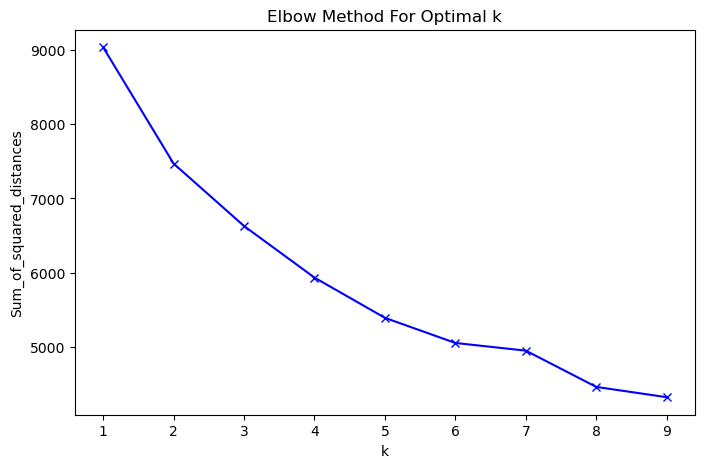

In [22]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (8, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
clusterer = KMeans(n_clusters=5,random_state=42).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
print(centers)

[[ 1.05964632e-01 -7.37736627e-02  1.74275923e-02  3.85661286e-03
   1.76001197e-03 -4.59997131e-03 -9.51080277e-04  1.24627619e-03
  -1.49195401e-04  8.08530709e-04]
 [ 6.63283663e-02  1.03545518e-01 -1.49923011e-03 -3.09133743e-02
  -1.01090457e-02  7.50850627e-03 -5.61602340e-04  4.56230068e-03
  -7.74733121e-04 -1.67403884e-04]
 [-5.75307082e-03  1.31310808e-01  4.93570395e-03  2.29974765e-01
   1.09984483e-01 -2.29202021e-02  3.71589449e-05 -6.44558855e-03
   7.85641730e-03  3.03371299e-03]
 [-7.44008863e-02 -1.09611160e-02 -2.69022955e-02 -6.81121040e-03
  -6.89094567e-03  1.43326487e-03  5.27402856e-04 -2.58028465e-03
  -3.03285320e-04 -4.20289538e-04]
 [-1.99077205e-01  1.61988170e-02  3.19564888e-01 -3.15369884e-02
   1.87807376e-02  6.15332974e-04  4.15327868e-03  1.10686875e-02
   1.08505836e-03 -3.91586235e-03]]


In [24]:
temp_df = df_pca.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = c_preds
temp_df.head()

/var/folders/jy/scgb3j3d27gglx2_mmbhf4sr0000gn/T/ipykernel_4186/1558269435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster'] = c_preds


,pc1,pc2,cluster
0,-0.113443,0.039084,3
1,-0.036988,0.108884,1
2,0.064282,0.103962,1
3,-0.093210,0.054093,3
4,0.094629,-0.037051,0


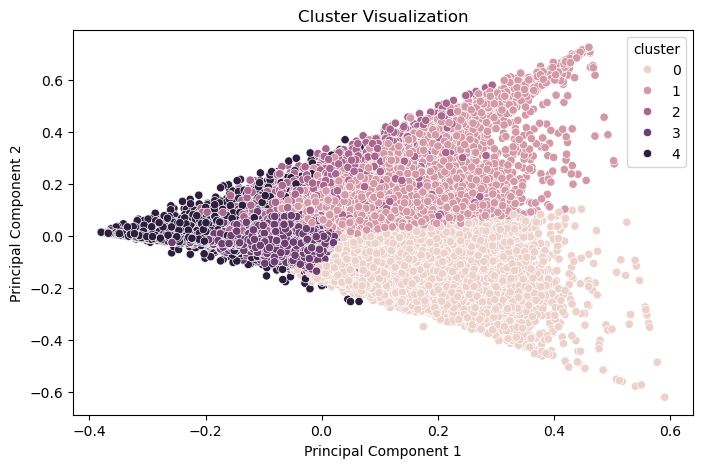

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

In [26]:
cross_df['cluster'] = c_preds

cluster1 = cross_df[cross_df.cluster == 0]
cluster2 = cross_df[cross_df.cluster == 1]
cluster3 = cross_df[cross_df.cluster == 2]
cluster4 = cross_df[cross_df.cluster == 3]
cluster5 = cross_df[cross_df.cluster == 4]

In [27]:
cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]


aisle
fresh vegetables                 37.082596
fresh fruits                     21.657433
packaged vegetables fruits       11.983578
yogurt                            6.119158
packaged cheese                   4.994279
fresh herbs                       4.157018
milk                              3.977876
soy lactosefree                   3.697297
frozen produce                    3.294023
water seltzer sparkling water     3.071480
dtype: float64

In [28]:
cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]


aisle
fresh fruits                     35.683368
fresh vegetables                 15.200160
packaged vegetables fruits       12.193124
yogurt                           10.017604
milk                              6.002912
packaged cheese                   5.186654
soy lactosefree                   3.796747
water seltzer sparkling water     3.640480
bread                             3.227815
chips pretzels                    3.162504
dtype: float64

In [29]:
cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]


aisle
packaged produce                 18.355877
fresh fruits                     10.900314
packaged vegetables fruits        4.236706
fresh vegetables                  3.101571
water seltzer sparkling water     1.720176
milk                              1.615588
packaged cheese                   1.542929
frozen produce                    1.146700
chips pretzels                    1.140918
nuts seeds dried fruit            1.034318
dtype: float64

In [30]:
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]


aisle
fresh fruits                     9.659493
fresh vegetables                 7.536574
yogurt                           7.163257
packaged vegetables fruits       5.957970
packaged cheese                  4.914268
chips pretzels                   4.476315
milk                             4.233557
water seltzer sparkling water    4.098986
refrigerated                     3.250499
ice cream ice                    3.096179
dtype: float64

In [31]:
cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]


aisle
water seltzer sparkling water    20.909533
fresh fruits                      3.283551
soft drinks                       2.802056
yogurt                            2.221869
energy granola bars               1.528785
tea                               1.318318
chips pretzels                    1.317757
milk                              1.310654
packaged vegetables fruits        1.209907
soy lactosefree                   1.068785
dtype: float64

In [32]:
cluster1.shape

(55414, 135)

In [33]:
cluster2.shape

(38799, 135)

In [34]:
cluster3.shape

(7955, 135)

In [35]:
cluster4.shape

(98691, 135)

In [36]:
cluster5.shape

(5350, 135)

1.  Cluster1 has 55851 columns with very strong inclination towards fresh vegetables followed by fresh fruits.
2.  Cluster2 has 37837 columns with very strong inclination towards fresh fruits followed by fresh vegetables.
3.  Cluster3 has 99157 columns with moderately strong inclination towards fresh fruits followed by fresh vegetables.
4.  Cluster4 has 7947 columns with very strong inclination towards packaged produce followed by fresh fruits.
5.  Cluster5 has 5417 columns with strong inclination towards water seltzer sparkling water followed by fresh fruits. 


In [37]:
df3.product_id.nunique()


49677